[View in Colaboratory](https://colab.research.google.com/github/pamsfwang/perceptual_learning/blob/master/stochastic_stimuli.ipynb)

In [0]:
import tensorflow as tf
import numpy
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt




In [251]:
#Mount Google drive on Colab
#step01
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
#step02: code for mounting google drive on Linux
!mkdir -p drive
!google-drive-ocamlfuse drive

#step03: change directory to the google drive folder for the project
os.getcwd()
!ls
os.chdir('./drive/Colab_files')
os.getcwd()
!ls

gpg: keybox '/tmp/tmpre25jypc/pubring.gpg' created
gpg: /tmp/tmpre25jypc/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
drive			     notebooks
jfj_stimuli_param.csv	     stimuli_param_uniqueF3.csv
jfj_stimuli_param_test.csv   stimuli_param_uniqueF3_test_new.csv
jfj_stimuli_param_train.csv  stimuli_param_uniqueF3_train_new.csv
models			     stimuli_param_uniqueF3_train_new.csv.ods
drive			     notebooks
jfj_stimuli_param.csv	     stimuli_param_uniqueF3.csv
jfj_stimuli_param_test.csv   stimuli_param_uniqueF3_test_new.csv
jfj_stimuli_param_train.csv  stimuli_param_uniqueF3_train_new.csv
models			     stimuli_param_uniqueF3_train_new.csv.ods


In [0]:
#specify variables
train_data = 'stimuli_param_uniqueF3_train_new.csv' #'jfj_stimuli_param_train.csv'
test_data = 'stimuli_param_uniqueF3_test_new.csv'# 'jfj_stimuli_param_test.csv'

num_features = 3
node_hidden01 = 10
epoch = 5000
learning_rate = 0.005
initial_weight01 = -0.01
initial_weight02 = 0.01

In [308]:
#load data
df=pd.read_csv(train_data, sep=',',header=None)
df.shape
nsamples =df.shape[0]
print "number of training samples:",nsamples

#shuffle the data
df_array = df.values
new = numpy.take(df_array,numpy.random.permutation(df_array.shape[0]),axis=0,out=df_array);

##separate data into features and labels (numpy.array)
temp = new[:,0:num_features] #df.iloc[:,0:num_features]
x_data = temp #temp.values
print "dimension of feature dataset:",x_data.shape
print(x_data[0:5,:])

temp = new[:,3]#df.iloc[:,num_features]
y_data = temp #temp.values
print "dimension of category dataset:",y_data.shape
print(y_data[0:5])


#load test data
df=pd.read_csv(test_data, sep=',',header=None)
df.shape
print "number of test samples:",df.shape[0]

##separate data into features and labels (numpy.array)
temp = df.iloc[:,0:num_features]
test_x_data = temp.values
print "dimension of feature dataset:",test_x_data.shape
print(test_x_data)

temp = df.iloc[:,num_features]
test_y_data = temp.values
print "dimension of category dataset:",test_y_data.shape
print(test_y_data)

number of training samples: 52
dimension of feature dataset: (52, 3)
[[2.  1.  6.8]
 [2.  4.  2.6]
 [3.  3.  0.2]
 [3.  3.  1.4]
 [2.  3.  2.3]]
dimension of category dataset: (52,)
[1. 0. 1. 0. 1.]
number of test samples: 16
dimension of feature dataset: (16, 3)
[[1.  0.  1.2]
 [1.  1.  4.2]
 [2.  0.  5.7]
 [2.  1.  1.8]
 [2.  4.  5.7]
 [3.  0.  2.1]
 [3.  1.  5.3]
 [4.  0.  5.7]
 [1.  4.  4.2]
 [2.  3.  0. ]
 [2.  4.  1.8]
 [3.  3.  4.2]
 [3.  4.  1.6]
 [3.  0.  1.1]
 [4.  3.  6.2]
 [4.  4.  4.2]]
dimension of category dataset: (16,)
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [309]:
#logistic regression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_data, y_data)
predictions = logisticRegr.predict(test_x_data)

acc = []
temp = predictions+test_y_data
for ii in xrange(len(temp)):
  if temp[ii] ==2 or temp[ii]==0:
    acc.append(1)
  else:
    acc.append(0)
    
accuracy_per = float(sum(acc))/float(len(acc))
print("calculate accuracy :" + repr(accuracy_per))
#print(len(acc))
#print(acc)
score = logisticRegr.score(test_x_data, test_y_data)
print(score)



calculate accuracy :0.8125
0.8125


In [0]:
##set up network layers
#You can think of most the tensorflow variables as actually being functions that we will call when we want to get their value. 
input_ph = tf.placeholder(tf.float32, shape=[num_features,1]) 
#This will be the place the input to the network is inserted
#shape: number of features

target_ph =  tf.placeholder(tf.float32, shape=[1,1]) 
#This will be the place the target for the network is insertedd
#shape = number of node

#First layer weights
W1 = tf.Variable(tf.random_uniform([node_hidden01,num_features],initial_weight01,initial_weight02)) 
#first layer: 3 input feautres to 10 nodes in the hidden layer

b1 = tf.Variable(tf.random_uniform([node_hidden01,1],initial_weight01,initial_weight02)) # " " biases
#one bias to the 10 nodes in the hidden layer
#[# nodes, # nodes], sampling from a random uniform distribution from -1 to 1 for initial weights

#2nd layer
W2 = tf.Variable(tf.random_uniform([1,node_hidden01],initial_weight01,initial_weight02)) 
#second layer: 10 nodes in the first hidden layer to one node in the second
b2 = tf.Variable(tf.random_uniform([1],initial_weight01,initial_weight02))


#####

##construct the network
h1 = tf.nn.tanh(tf.matmul(W1,input_ph)+b1)
#y = tanh(x1w11+x2w21)
#tf.matmul: matrix multiplication

output = tf.nn.sigmoid(tf.matmul(W2,h1)+b2) 
#This is the actual construction of the network. 
#When we want to get the output of the network, we will tell tensorflow what to put in the input placeholder, and then we'll run this output function

loss = tf.reduce_sum(tf.square(output - target_ph))
#This is the function we're trying to optimize. The reduce_sum is not really necessary since we only have a single output, just using it to flatten the output.

#optimizer = tf.train.AdamOptimizer(learning_rate) 
optimizer = tf.train.AdamOptimizer(learning_rate)
#This is a fancy version of momentum based gradient descent optimization.

train = optimizer.minimize(loss) 
#This will be how we tell the network to train on an example


In [0]:
def test():
    MSE = 0.0
    for i in xrange(len(x_data)):
      MSE += sess.run(loss,feed_dict={input_ph: x_data[i].reshape([num_features,1]),target_ph: y_data[i].reshape([1,1])}) #test on a test data point. feed_dict is how you pass things in to the placeholders created above
    MSE /= len(x_data)
    return MSE

def accuracy():
    temp =numpy.empty((nsamples,1))
    #acc=[]
    for i in xrange(len(x_data)):
        #temp.append(sess.run(output,feed_dict={input_ph: x_data[i].reshape([num_features,1])}))
        result = sess.run(output,feed_dict={input_ph: x_data[i].reshape([num_features,1])})
        temp[i,:] = result
        #temp= numpy.append(temp,[result],axis=0)
    return temp
    #t2 = temp+y_data
    #for ii in xrange(len(t2)):
    #  if t2[ii] ==2 or t2[ii]==0:
    #    acc.append(1)
    #  else:
    #    acc.append(0)
    #accuracy_per = float(sum(acc))/float(len(acc)) 
    #return accuracy_per
    
    
def hidden():
    temp = numpy.empty((nsamples,node_hidden01))
    for i in xrange(len(y_data)):
        #temp.append(sess.run(h1,feed_dict={input_ph: x_data[i].reshape([num_features,1])}))
        result = sess.run(h1,feed_dict={input_ph: x_data[i].reshape([num_features,1])})
        temp[i,:]=numpy.transpose(result)
    return temp

In [0]:
# Launch the graph -- tell tensorflow to initialize everything.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) #first argument to sess.run is function to run, here we're running the initialize function

# Fit the function
print "Pre training MSE:", test
ac = numpy.empty((nsamples,epoch))
hid = []#numpy.empty((node_hidden01,nsamples,epoch))
los = []
new_y = numpy.empty((nsamples,epoch))
new_x = numpy.empty((nsamples,num_features,epoch))
for step in xrange(epoch):
  #load data
  df=pd.read_csv(train_data, sep=',',header=None)
  #shuffle the data
  df_array = df.values
  new = numpy.take(df_array,numpy.random.permutation(df_array.shape[0]),axis=0,out=df_array);
  #separate data into features and labels (numpy.array)
  x_data = new[:,0:num_features] #features
  y_data = new[:,3] #labels
  
  #run the model 
  for item in xrange(nsamples):
    sess.run(train,feed_dict={input_ph: x_data[item].reshape([num_features,1]),target_ph: y_data[item].reshape([1,1])}) 
  
  
  #save out results on each iteration
  ac[:,step]=numpy.transpose(accuracy())
  #ac.append(accuracy())
  #hid[:,step]=numpy.transpose(hidden())
  hid.append(hidden())
  los.append(test())
  new_y[:,step] = y_data
  new_x[:,:,step] = x_data
  
  #print out loss
  if step % 100 == 0:
    print "On step %i, test MSE %f" %(step,test())

Pre training MSE: <function test at 0x7f0f09c4fa28>
On step 0, test MSE 0.249455
On step 100, test MSE 0.201976
On step 200, test MSE 0.201124
On step 300, test MSE 0.198334
On step 400, test MSE 0.195319
On step 500, test MSE 0.187233
On step 600, test MSE 0.182820
On step 700, test MSE 0.180504
On step 800, test MSE 0.175518
On step 900, test MSE 0.170811
On step 1000, test MSE 0.165717
On step 1100, test MSE 0.162610
On step 1200, test MSE 0.160304
On step 1300, test MSE 0.158646
On step 1400, test MSE 0.157692
On step 1500, test MSE 0.156451
On step 1600, test MSE 0.155629
On step 1700, test MSE 0.155447
On step 1800, test MSE 0.154188
On step 1900, test MSE 0.153197
On step 2000, test MSE 0.152629
On step 2100, test MSE 0.152343
On step 2200, test MSE 0.150739
On step 2300, test MSE 0.149725
On step 2400, test MSE 0.148438


In [305]:
print "Post training MSE:", test()
print "Final weights:"
#print(sess.run(W1),sess.run(b1),sess.run(W2),sess.run(b2))


Post training MSE: 0.037189333065881944
Final weights:


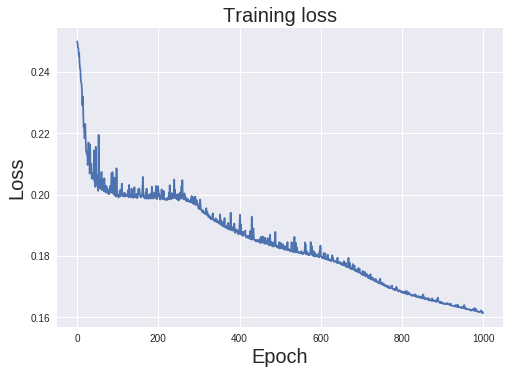

In [312]:
plt.plot(los)
plt.ylabel('Loss', fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.title('Training loss', fontsize = 20)
plt.show()

#plt.imshow(hid[1][:][1],cmap=plt.cm.BuPu_r)
#plt.show()

In [259]:
len(new_y[1])
len(hid[1])

dim1=len(hid)
dim2 = len(hid[0])
dim3 = len(hid[0][0])
print(repr(dim1),repr(dim2),repr(dim3))

print(new_y[:,0])
#print(hid[1][1])
#print(hid[1][2])

zero_ind = numpy.asarray(numpy.where(new_y[:,0]==0))
print(zero_ind)
print(new_y[:,0][zero_ind])
print(zero_ind.shape)

#nn = numpy.empty((len(zero_ind),node_hidden01))
nn = hid[0][zero_ind]
print(nn.shape)
#print(numpy.corrcoef(hid[1][1],hid[1][2],rowvar=False))
#corr(hid[1][1],hid[1][2])
nnewshape = numpy.reshape(nn,(26,10))
print(nnewshape.shape)
meanzero = numpy.mean(nnewshape,axis=0)
print('shape of the average hidden layer'+repr(meanzero.shape))
print(meanzero)


('5000', '52', '10')
[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 1.]
[[ 2  4  5  7  8  9 13 15 18 21 22 24 26 27 32 33 35 36 37 38 40 42 44 45
  47 48]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
(1, 26)
(1, 26, 10)
(26, 10)
shape of the average hidden layer(10,)
[-0.29020978  0.23491973  0.27593293 -0.20822945  0.17894969 -0.14457464
  0.07964603  0.27337324  0.20773087 -0.15495575]


In [246]:
one_ind = numpy.asarray(numpy.where(new_y[:,0]==1))
print(one_ind)
none = hid[0][one_ind]

noneshape = numpy.reshape(none,(26,10))
print(noneshape.shape)
meanone = numpy.mean(noneshape,axis=0)
print('shape of the average hidden layer'+repr(meanone.shape))
print(meanone)

co = numpy.corrcoef(meanzero,meanone)
print(co)


[[ 2  5  8  9 13 14 15 18 21 24 27 28 29 32 33 34 35 37 38 40 42 43 45 47
  48 50]]
(26, 10)
shape of the average hidden layer(10,)
[-0.17636411  0.15684113  0.16349359 -0.16670421 -0.18732448  0.15829348
  0.15733762 -0.11771902  0.17352752  0.12826859]
[[1.        0.9997676]
 [0.9997676 1.       ]]


In [0]:
final_co = [];#numpy.empty((0,epoch))
for step in xrange(epoch):
  zero_ind = numpy.asarray(numpy.where(new_y[:,0]==0))
  nn = hid[step][zero_ind]
  nnewshape = numpy.reshape(nn,(26,10))
  meanzero = numpy.mean(nnewshape,axis=0)
  
  one_ind = numpy.asarray(numpy.where(new_y[:,0]==1))
  none = hid[step][one_ind]
  noneshape = numpy.reshape(none,(26,10))
  meanone = numpy.mean(noneshape,axis=0)

  co = numpy.corrcoef(meanzero,meanone)
  final_co.append(co[0,1])
  #print(co)
#print(final_co)


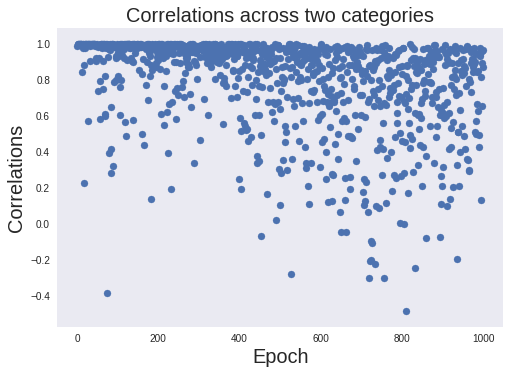

In [315]:
f = numpy.asarray(final_co)
x_epoch = numpy.asarray(range(1,epoch+1))

plt.scatter(x_epoch,f)
plt.ylabel('Correlations', fontsize = 20)
plt.xlabel('Epoch',fontsize = 20)
plt.title('Correlations across two categories', fontsize = 20)
plt.grid(False)
plt.show()


In [224]:
type(numpy.asarray(zero_ind))

numpy.ndarray

In [0]:
len(ac[1])


In [177]:
a = numpy.array([3, 5,7,6])
print(a[1:2])
  

[5]


In [5]:
#load test data
df=pd.read_csv(test_data, sep=',',header=None)
df.shape
print "number of test samples:",df.shape[0]

##separate data into features and labels (numpy.array)
temp = df.iloc[:,0:num_features]
test_x_data = temp.values
print "dimension of feature dataset:",test_x_data.shape
print(test_x_data)

temp = df.iloc[:,num_features]
test_y_data = temp.values
print "dimension of category dataset:",test_y_data.shape
print(test_y_data)

number of test samples: 8
dimension of feature dataset: (8, 3)
[[1 1 2]
 [2 1 2]
 [3 3 2]
 [4 3 2]
 [1 3 2]
 [2 3 2]
 [3 1 2]
 [4 1 2]]
dimension of category dataset: (8,)
[1 1 1 1 0 0 0 0]


In [33]:
# Launch the graph -- tell tensorflow to initialize everything.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) #first argument to sess.run is function to run, here we're running the initialize function

# Fit the function
print "Pre training MSE:", test
ac = []
hid = []
los = []
for step in xrange(600):
  for item in xrange(nsamples):
    #sess.run(train,feed_dict={input_ph: x_data[item].reshape([3,1]),target_ph: y_data[item].reshape([1,1])}) 
  sess.run(train,feed_dict={input_ph: x_data[step % nsamples].reshape([num_features,1]),target_ph: y_data[step % nsamples].reshape([1,1])}) 
  #sess.run(train): this will train the model, update the weights
  #Run training on an example
  ac.append(accuracy())
  hid.append(hidden())
  los.append(test())
  if step % 100 == 0:
    print "On step %i, test MSE %f" %(step,test())

IndentationError: ignored